In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import MySQLdb
import datetime

In [2]:
# убрать сегменты дальше Самары

data = pd.read_excel('fpk_data/model/results_60.xls')
whole_res = pd.read_excel('fpk_data/model/whole_results_60.xls')

In [ ]:
# %%time
# db_connection = MySQLdb.connect(host="194.247.15.117", 
#                      port=7806,
#                      user="bar",
#                      passwd="PASSWORD",
#                      db="Inventory")

# whole_data = pd.read_sql('SELECT * FROM Inventory.vTotalPassengers_v2', con=db_connection)
# db_connection.close()

In [ ]:
# whole_data.sort_values(by=['fltNrDptDt', 'FlightID'], inplace=True)
# whole_data.drop(whole_data.index[whole_data.fltNrDptDt > datetime.date(2017, 3, 31)], axis = 0, inplace = True)
# whole_data.tail(25)

In [3]:
# whole_res['Date'] = whole_data[int(len(whole_data) * 0.9):].fltNrDptDt.values
whole_res.head(50)

,FlightID,Code,fltNrDptDt,DptTime,ArrTime,flightNrSf,segment,DayOfWeekDpt,WeekOfMonth,MonthDpt,QuarterDpt,YearDpt,DayOfWeeArr,WeekOfMonthArr,MonthArr,QuarterArr,YearArr,Holiday,actual,predictions
112855,163954,4,2017-03-04,19,23,6,13,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112856,163954,5,2017-03-04,19,23,6,13,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112857,163954,1,2017-03-04,19,1,6,51,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112858,163954,2,2017-03-04,19,1,6,51,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112859,163954,4,2017-03-04,19,1,6,51,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112860,163954,5,2017-03-04,19,1,6,51,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112861,163954,1,2017-03-04,19,5,6,53,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112862,163954,2,2017-03-04,19,5,6,53,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112863,163954,4,2017-03-04,19,5,6,53,5,1,3,1,2017,6,1,3,1,2017,0,0,0
112864,163954,5,2017-03-04,19,5,6,53,5,1,3,1,2017,6,1,3,1,2017,0,0,0


In [5]:
# plt.figure(figsize=(20, 10))
# x = np.arange(0, len(whole_res[:50]))
# fn =2
# code = 0
# plt.plot(x, whole_data[whole_res.flightNrSf == fn][whole_res.Code == code][:50].actual, 'r', x, whole_res[whole_res.flightNrSf == fn][whole_res.Code == code][:50].predictions, 'g')

In [6]:
res = whole_res.copy()
res_s = pd.DataFrame(columns = ("FlightID", "Code", "Date", "FltNr", "actual", "predictions"))
count = 0
for flightID in res.FlightID.unique():
    for code in res.Code[res.FlightID == flightID].unique():
        date = res.fltNrDptDt[res.FlightID == flightID][res.Code == code].values[0]
        fltNr = res.flightNrSf[res.FlightID == flightID][res.Code == code].values[0]
        res_s.loc[count] = (flightID, code, date, fltNr, sum(res.actual[res.FlightID == flightID][res.Code == code].values), sum(res.predictions[res.FlightID == flightID][res.Code == code].values))
        count += 1

In [7]:
data = res_s.copy()
data.head()

,FlightID,Code,Date,FltNr,actual,predictions
0,163954.0,4.0,2017-03-04,6.0,86.0,73.0
1,163954.0,5.0,2017-03-04,6.0,43.0,72.0
2,163954.0,1.0,2017-03-04,6.0,2.0,7.0
3,163954.0,2.0,2017-03-04,6.0,10.0,10.0
4,58608.0,1.0,2017-03-05,7.0,15.0,9.0


In [39]:
len(data[data.FltNr == 12])

0

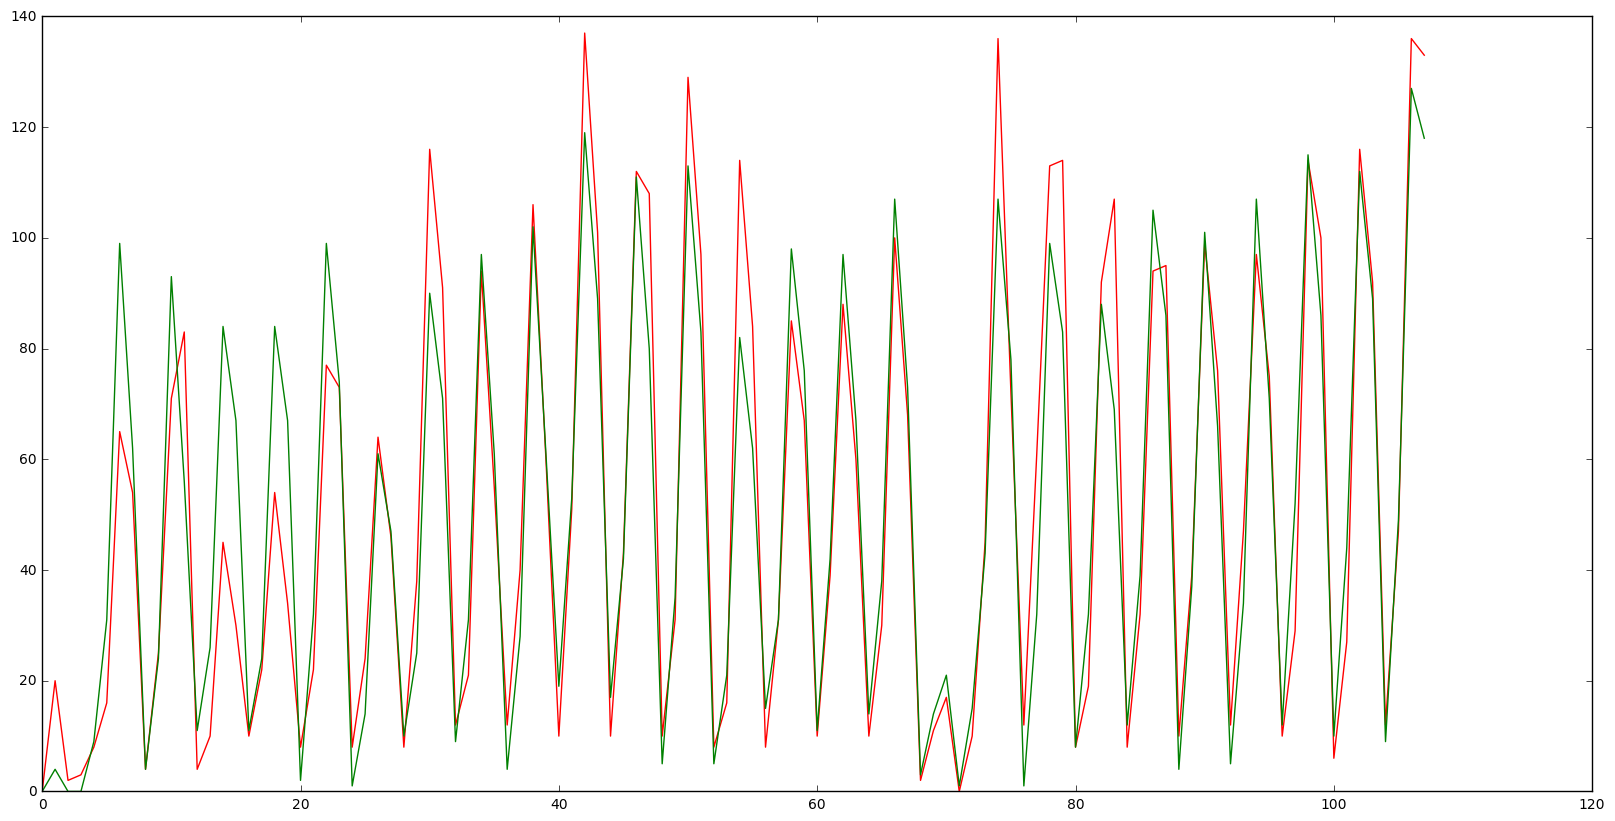

In [49]:
plt.figure(figsize=(20, 10))
fn = 0
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions * 1, 'g')

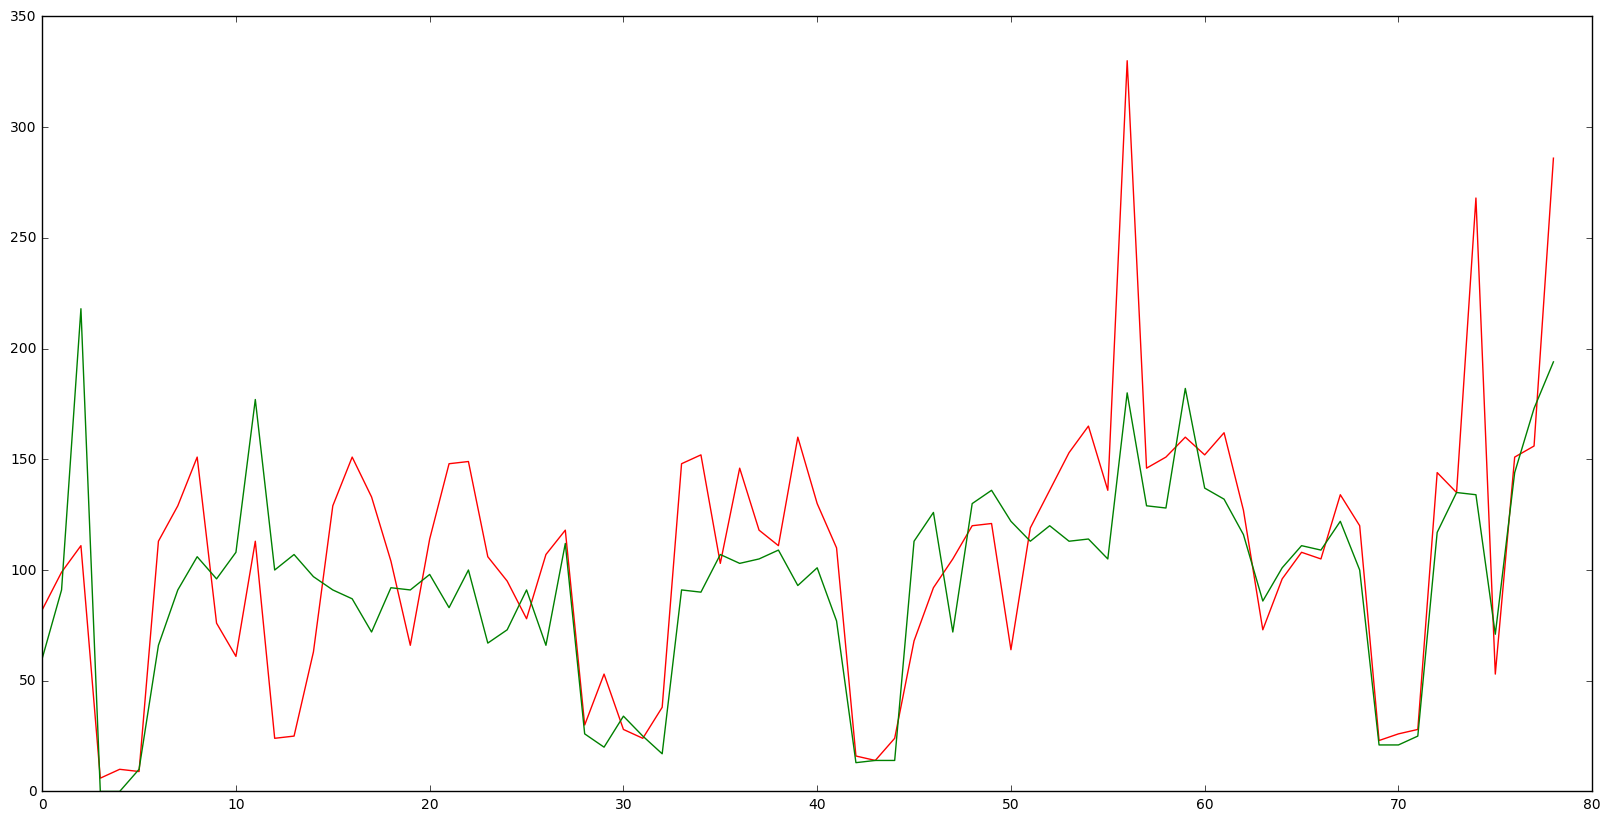

In [21]:
plt.figure(figsize=(20, 10))
fn = 1
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

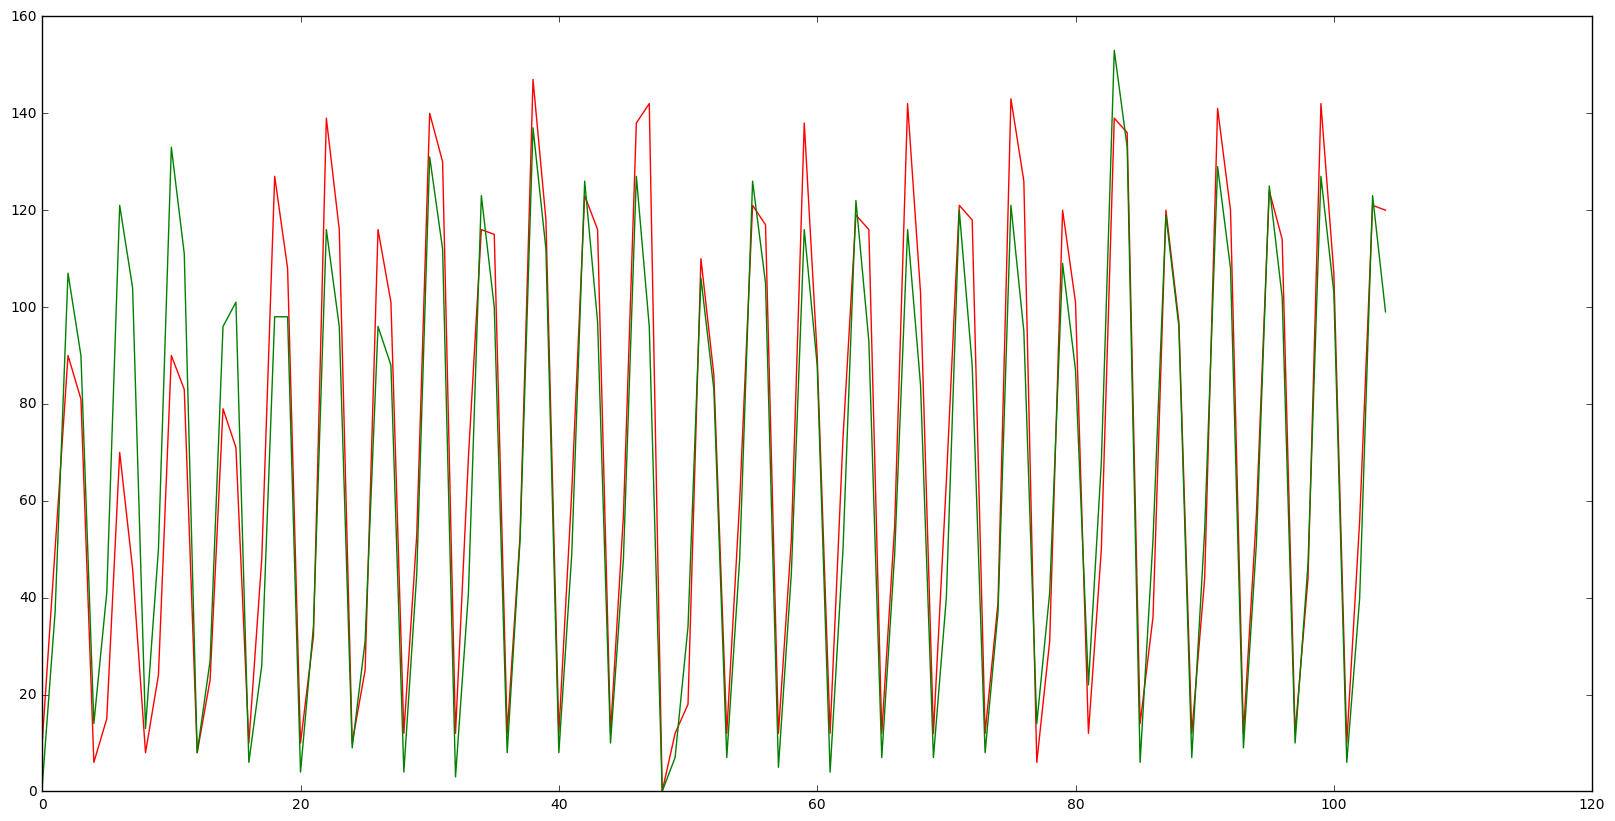

In [22]:
plt.figure(figsize=(20, 10))
fn = 2
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

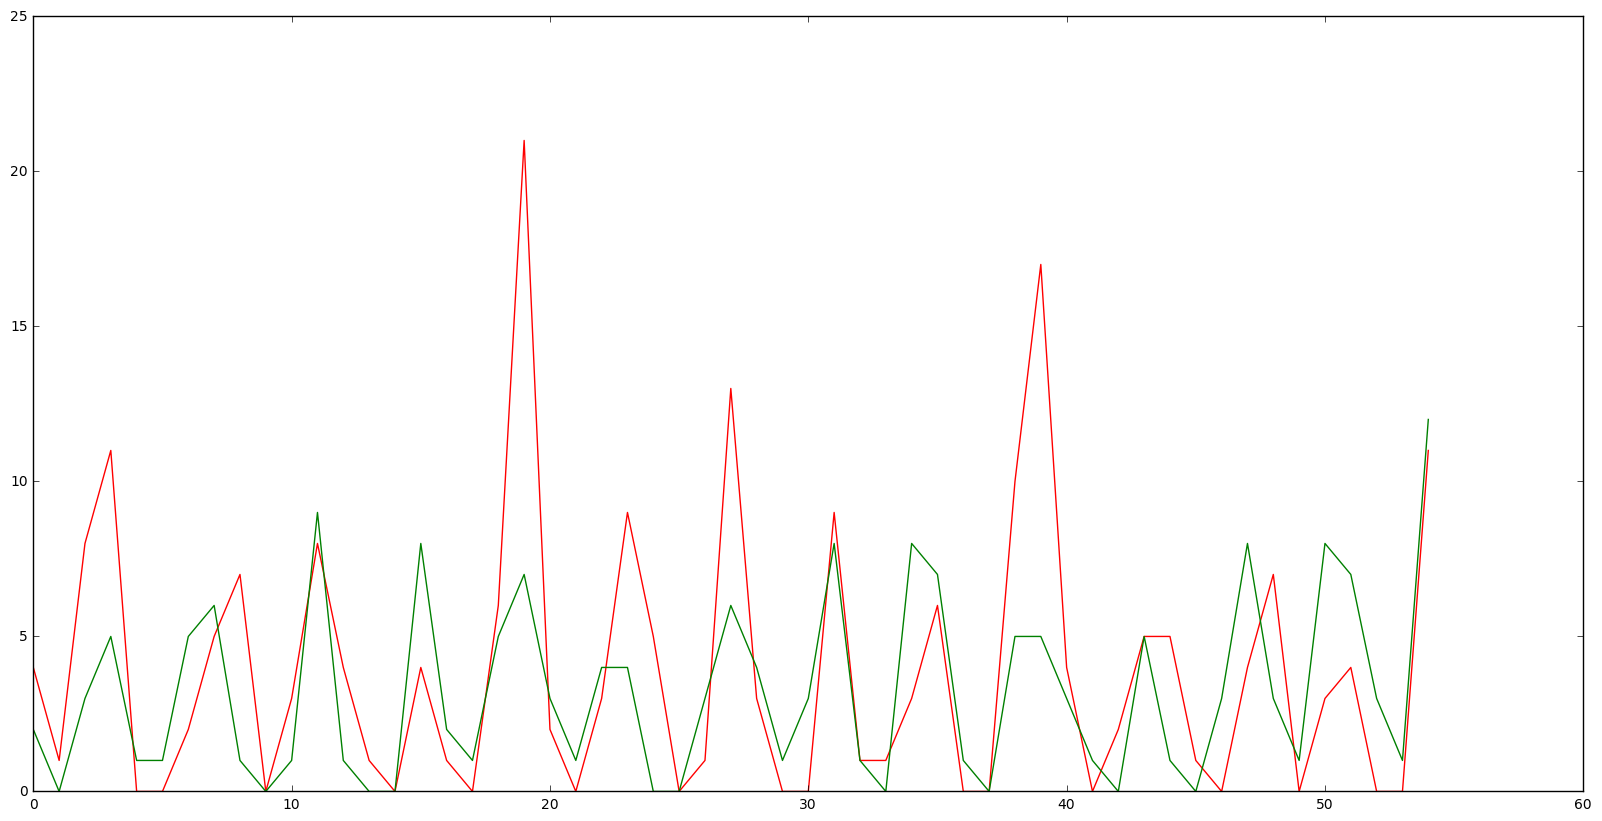

In [23]:
plt.figure(figsize=(20, 10))
fn = 3
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

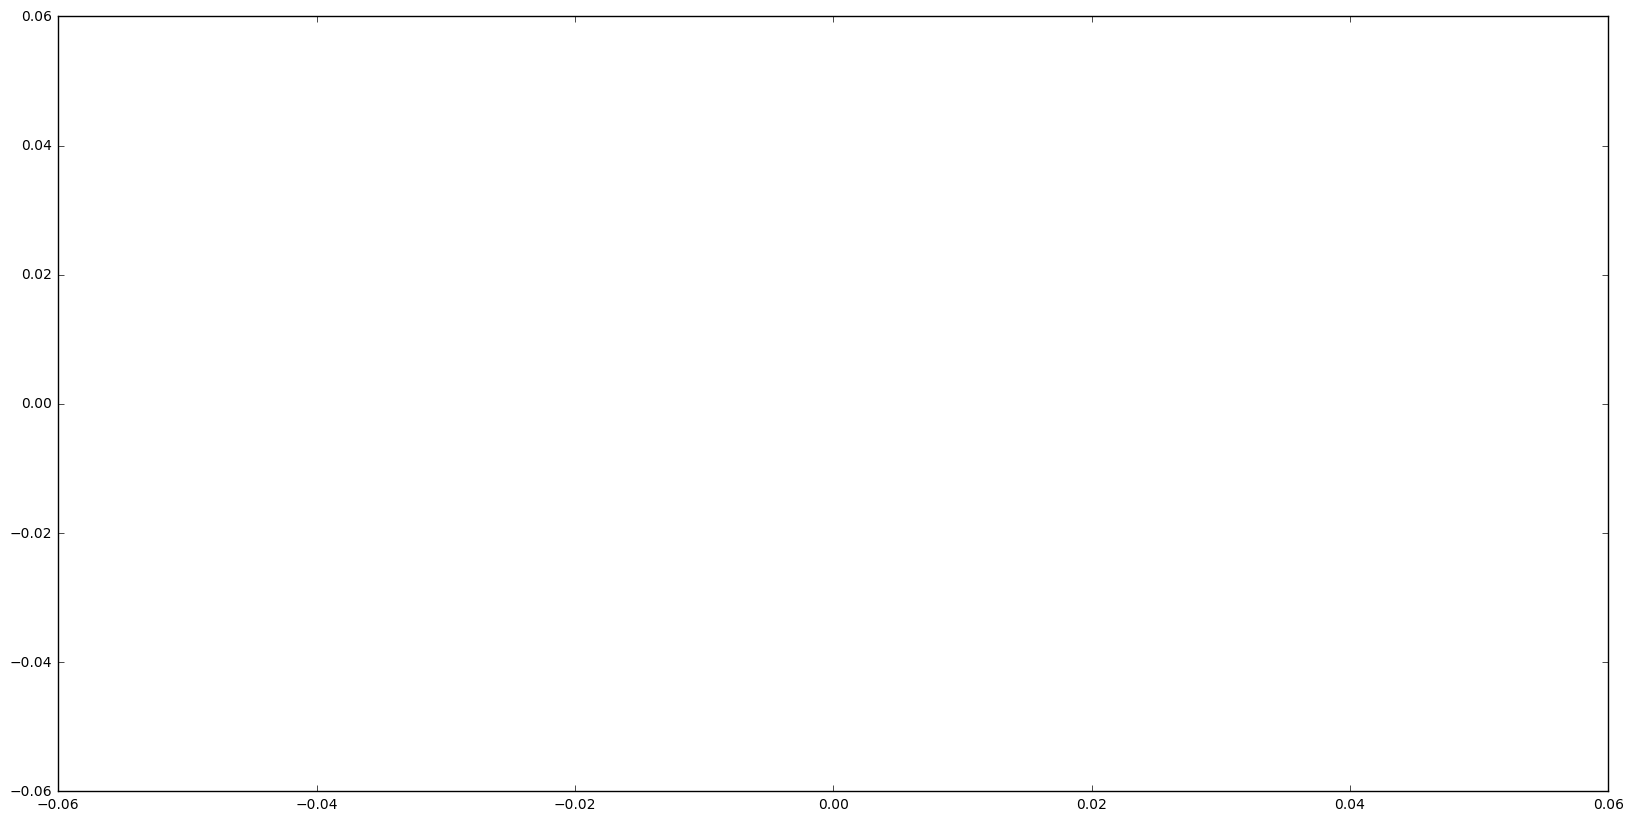

In [26]:
plt.figure(figsize=(20, 10))
fn = 4
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

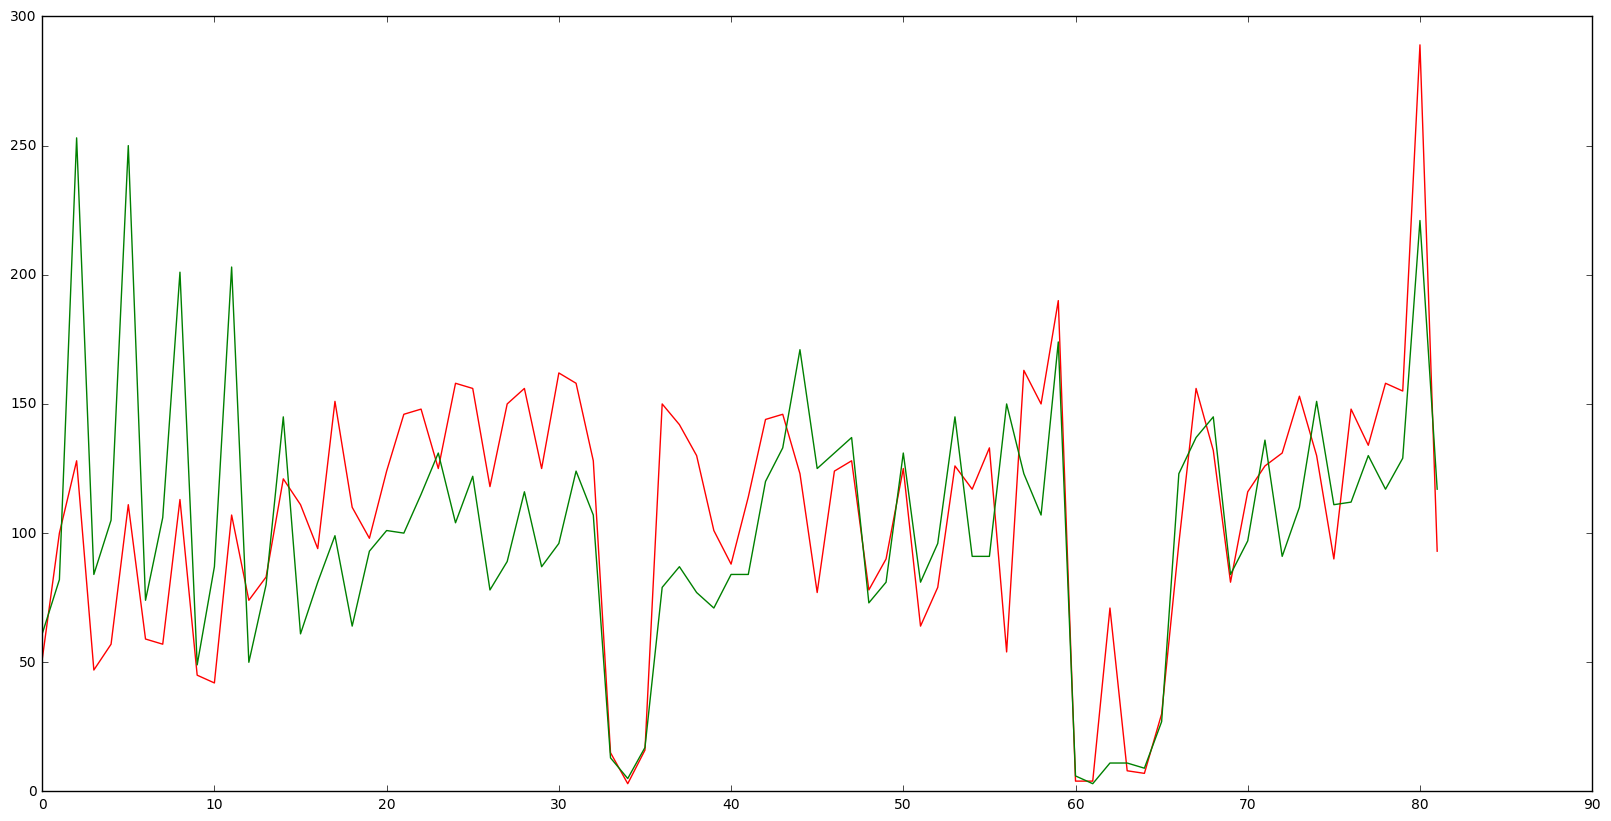

In [27]:
plt.figure(figsize=(20, 10))
fn = 5
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

In [59]:
df = data[data.FltNr == 7].groupby(['FlightID', 'Date'])['actual', 'predictions'].sum()
df.to_csv('10J.csv', sep=';')

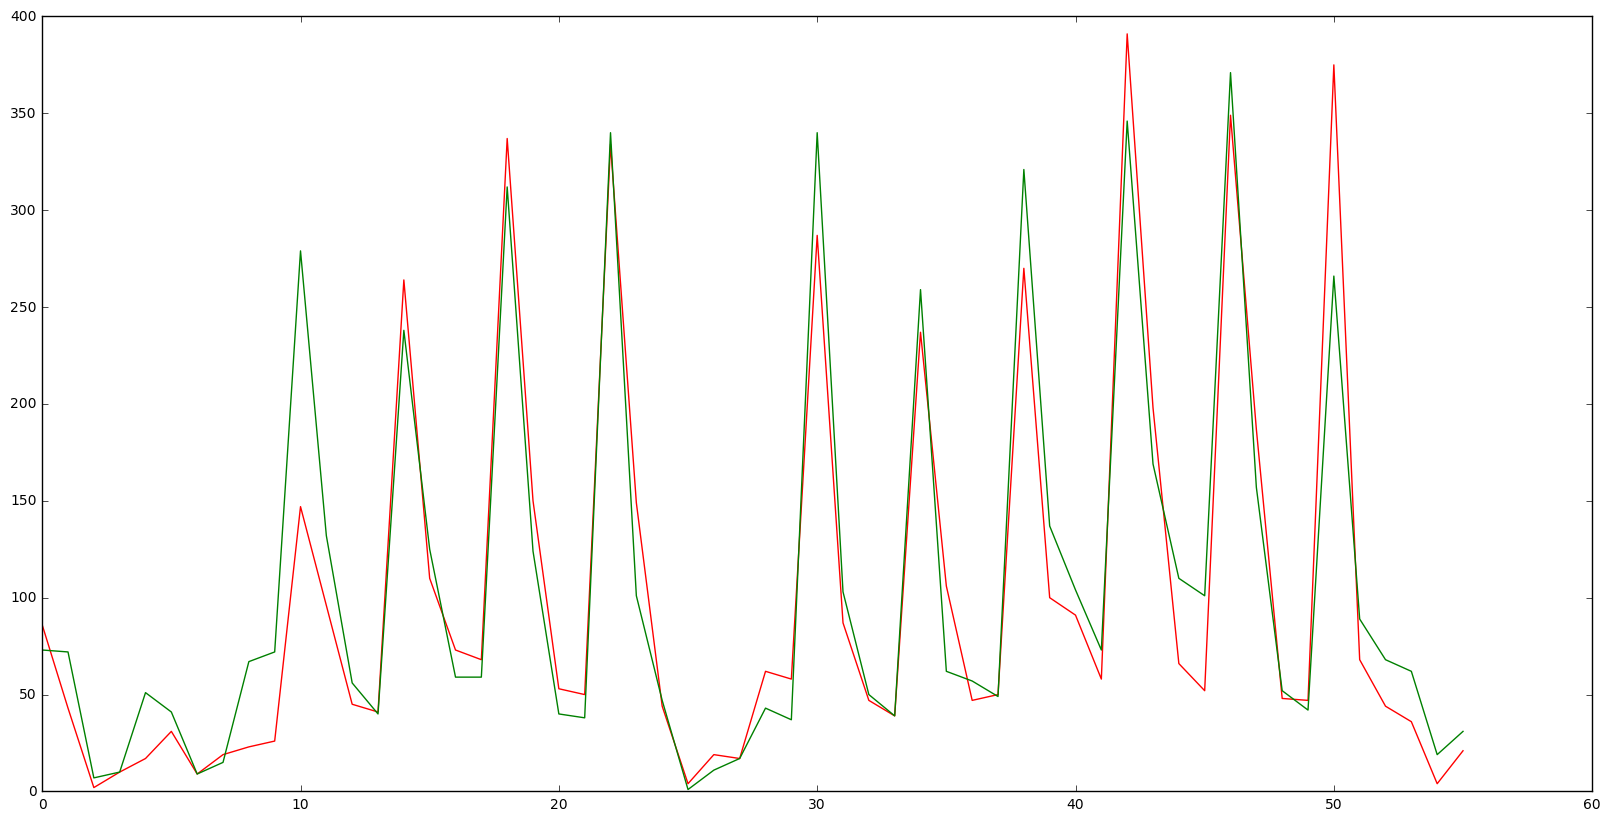

In [30]:
plt.figure(figsize=(20, 10))
fn = 6
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

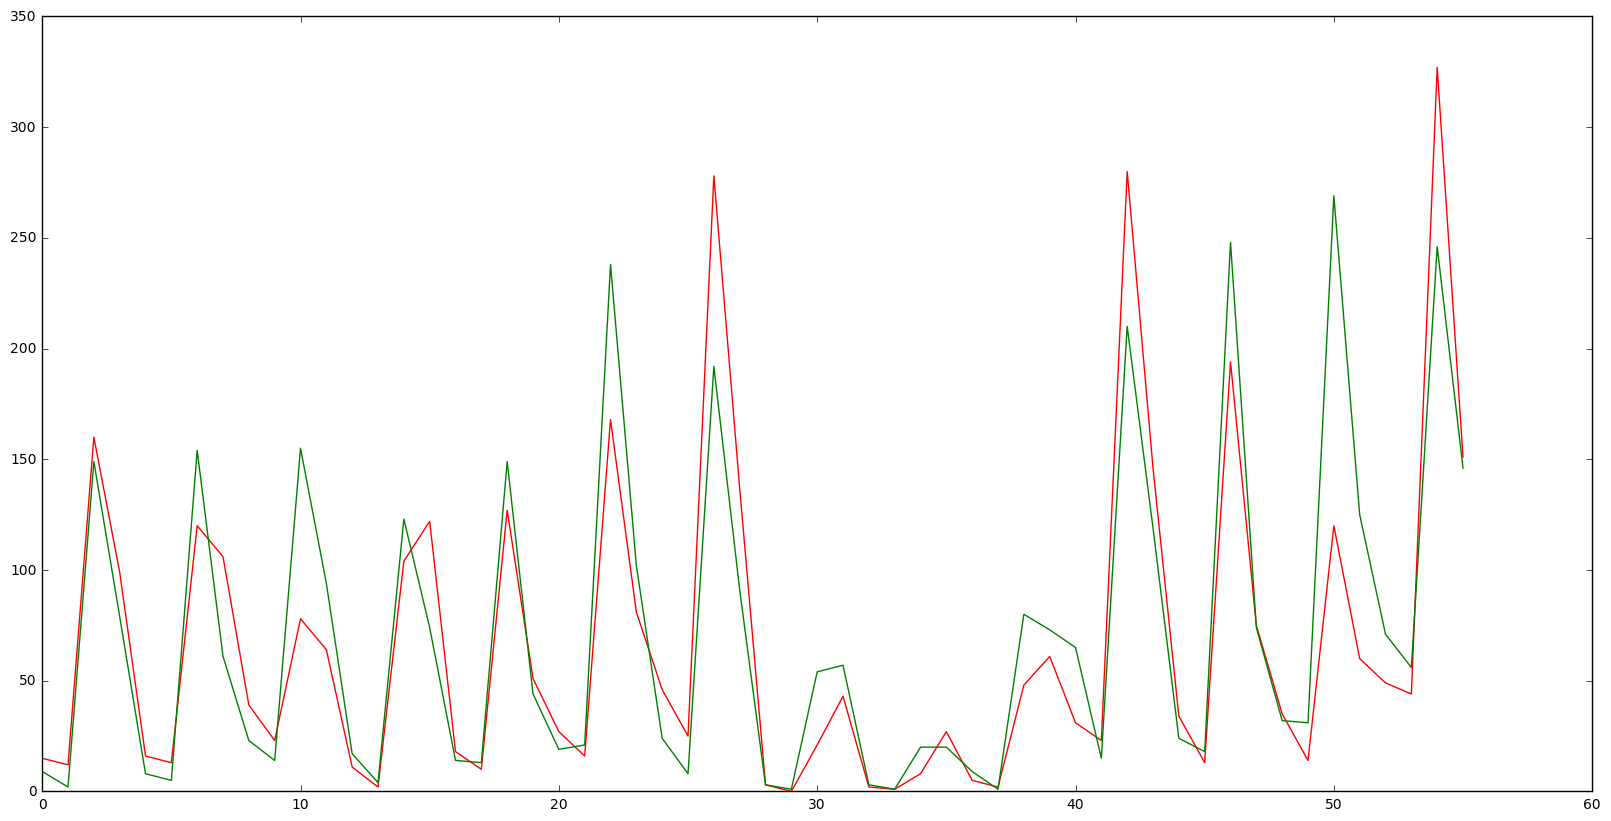

In [31]:
plt.figure(figsize=(20, 10))
fn = 7
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

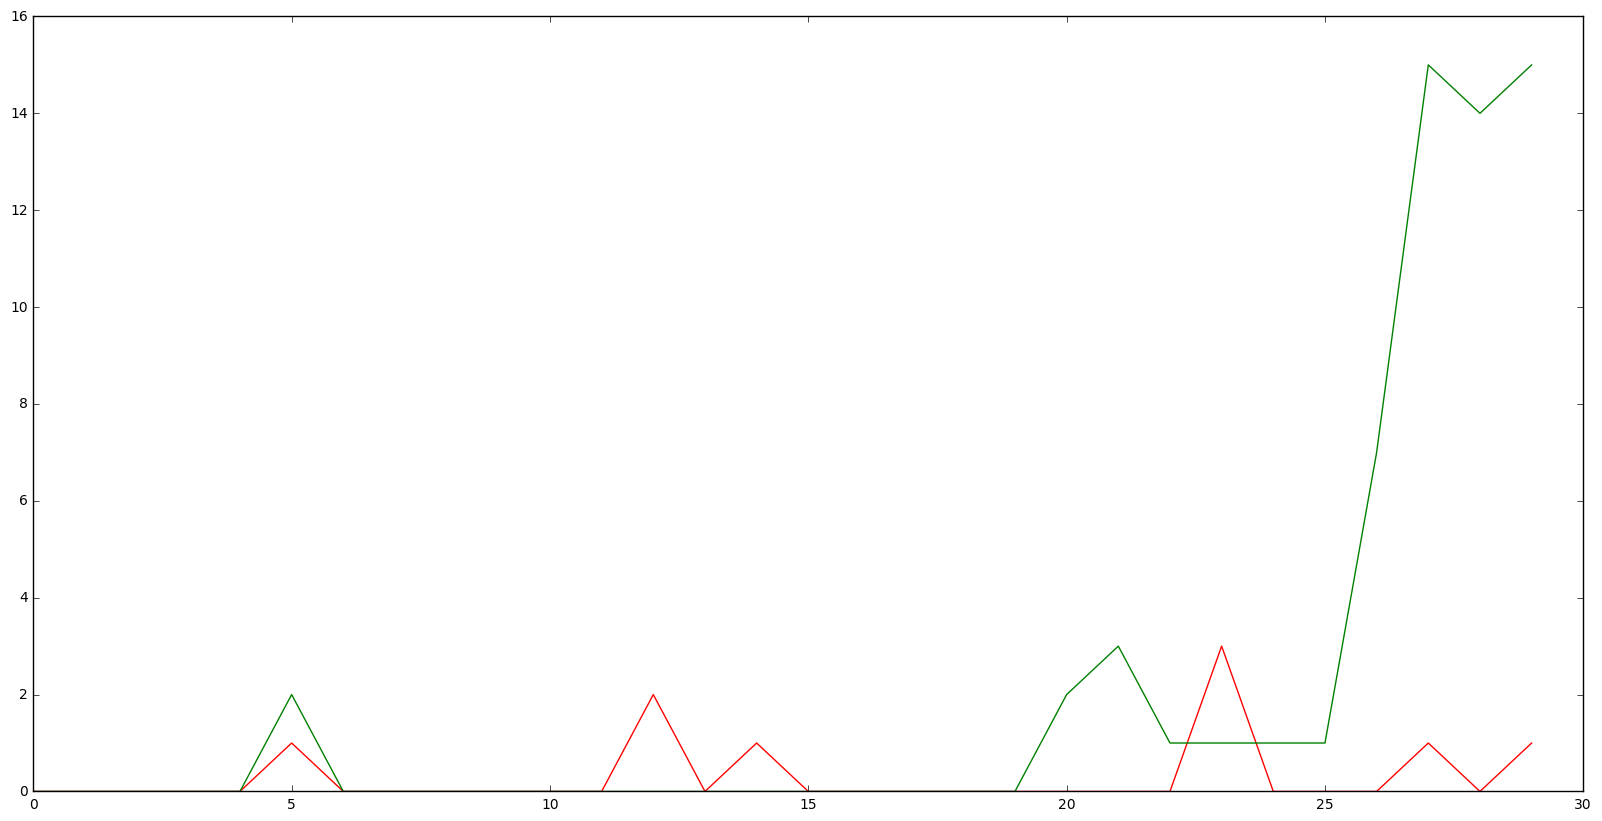

In [32]:
plt.figure(figsize=(20, 10))
fn = 8
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

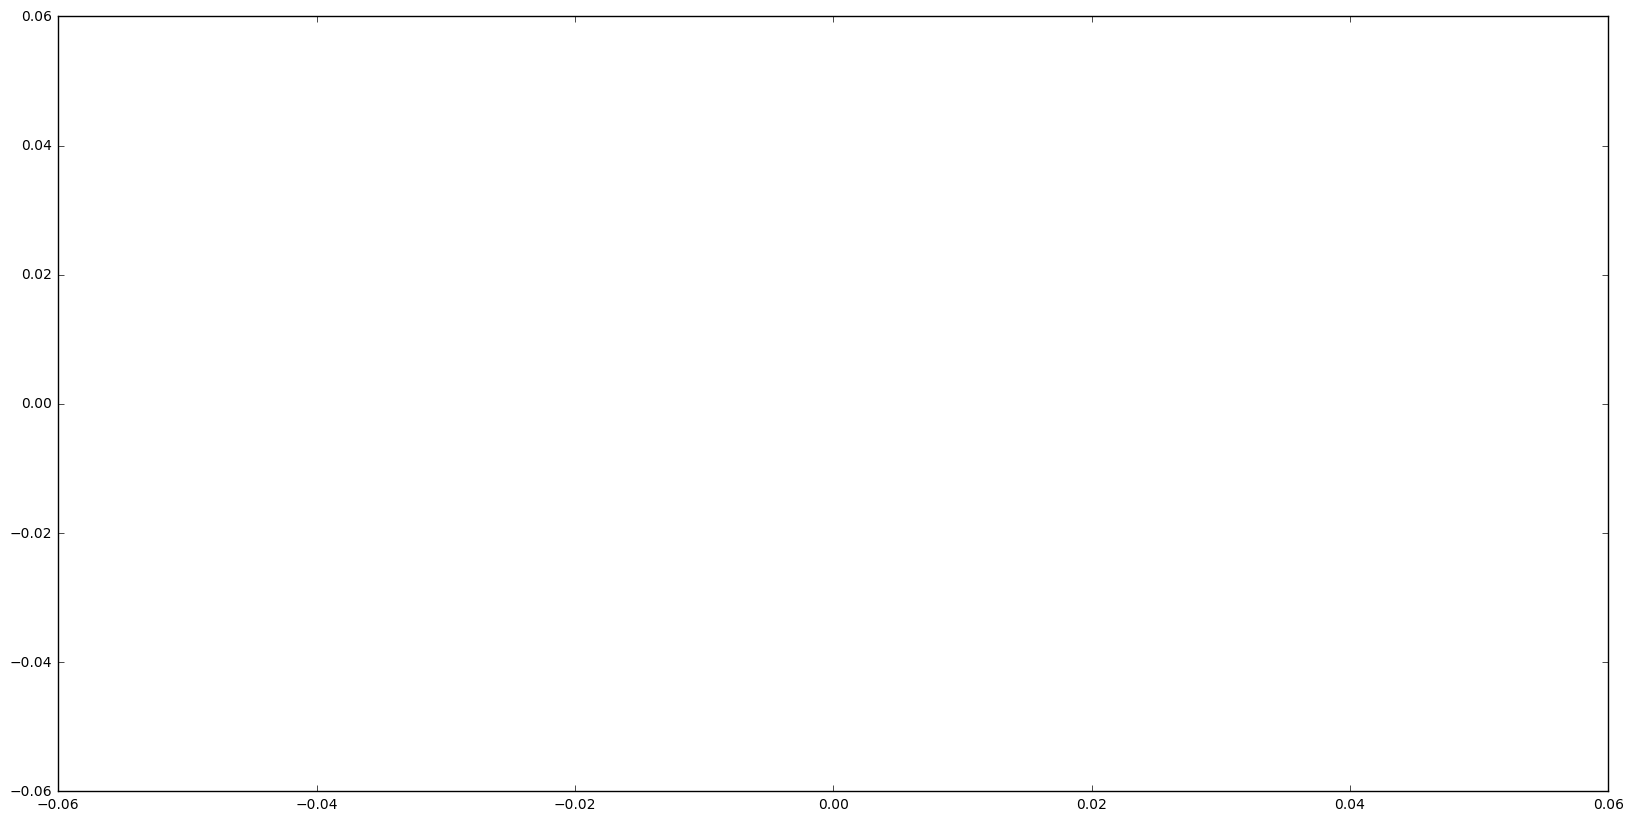

In [33]:
plt.figure(figsize=(20, 10))
fn = 9
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

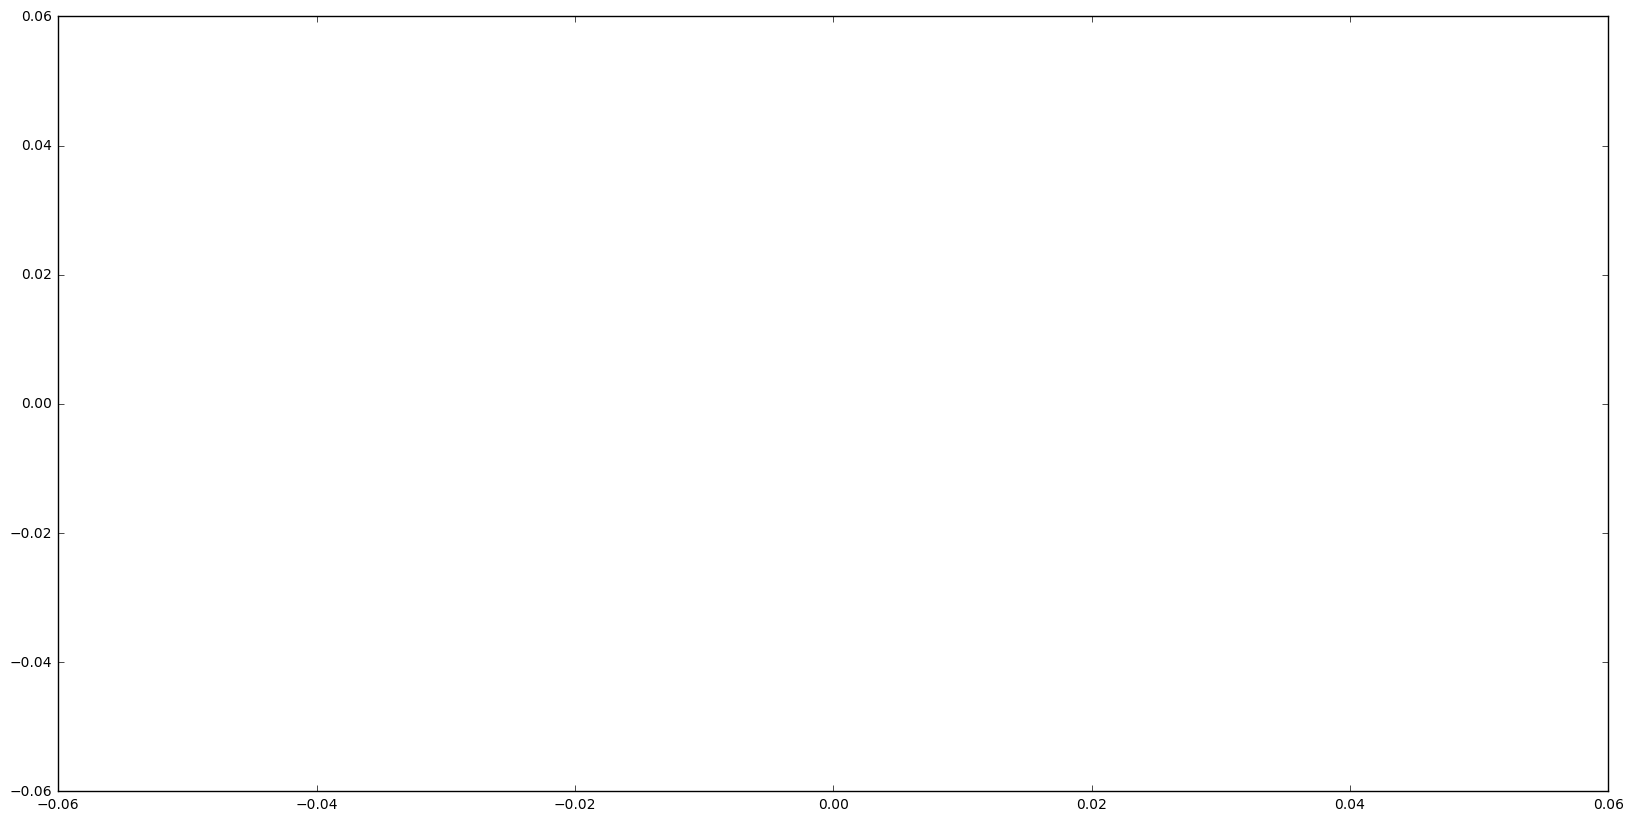

In [34]:
plt.figure(figsize=(20, 10))
fn = 10
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

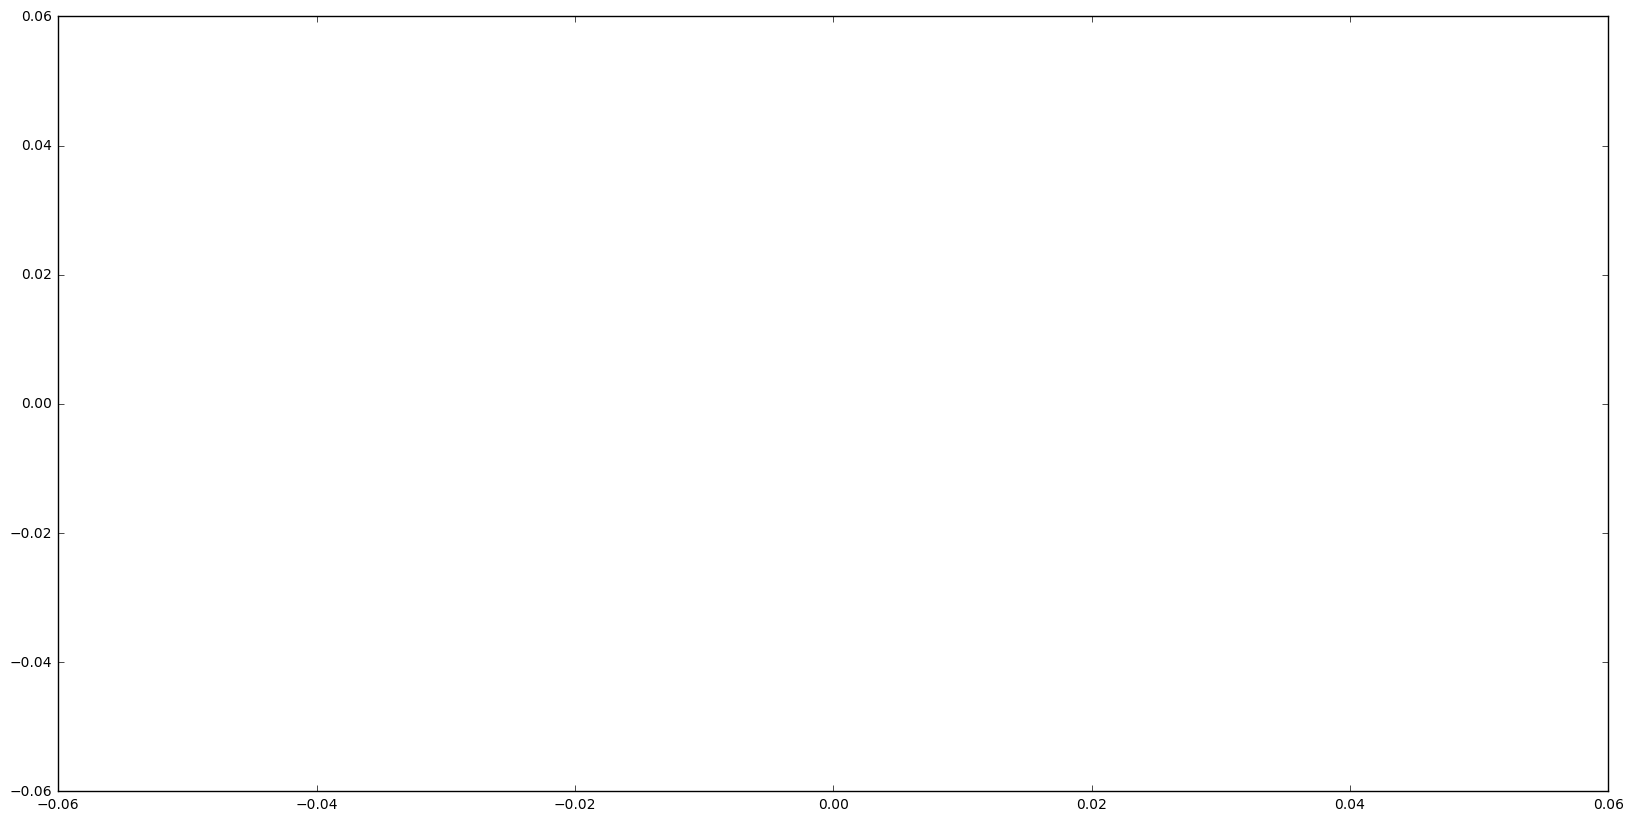

In [35]:
plt.figure(figsize=(20, 10))
fn = 11
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

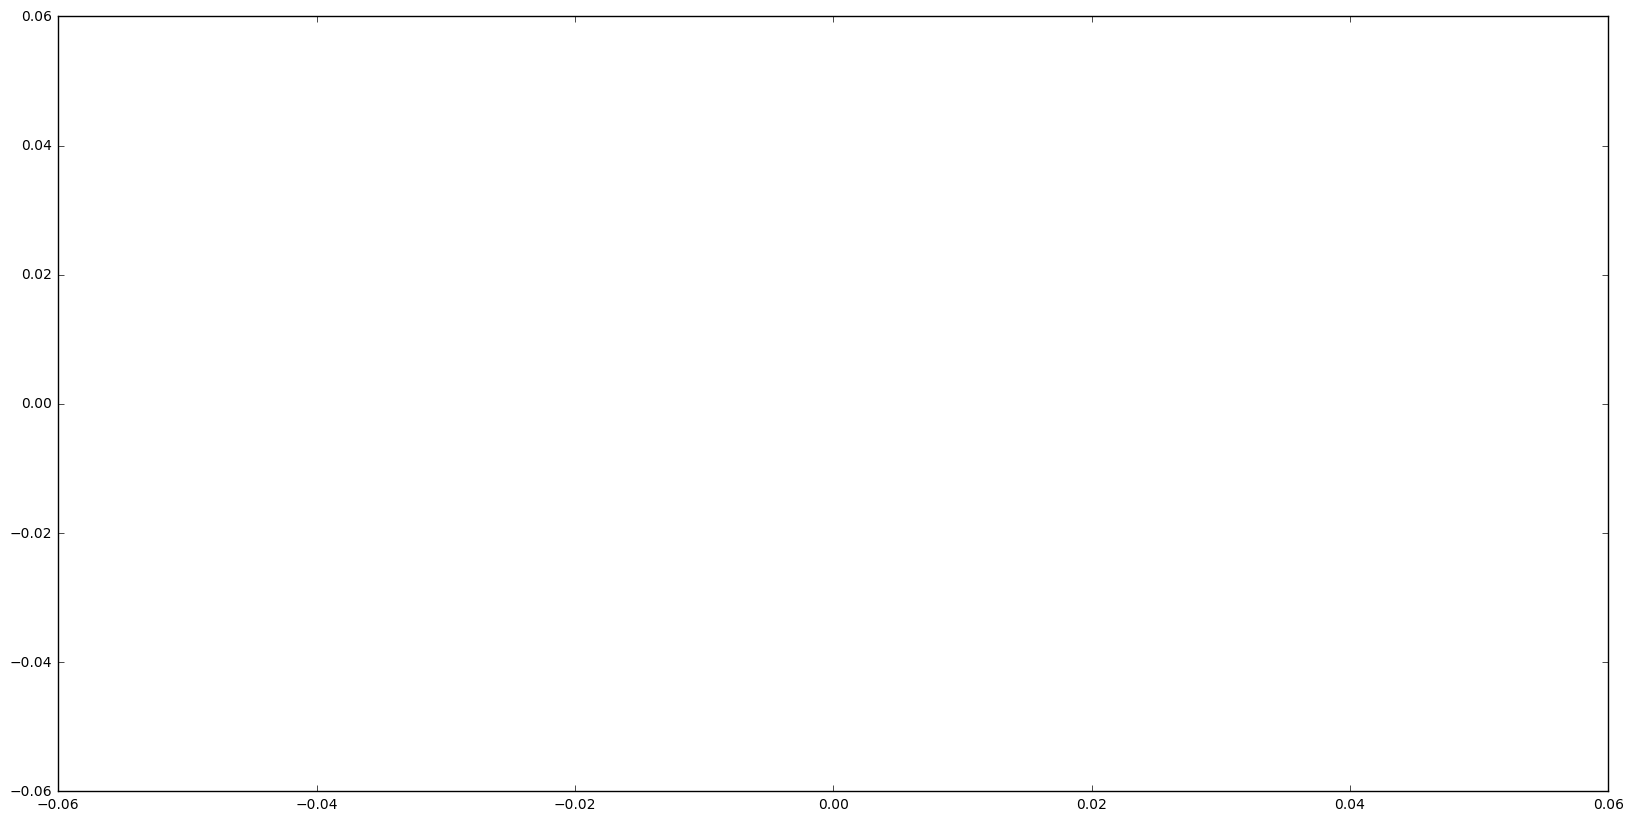

In [40]:
plt.figure(figsize=(20, 10))
fn = 12
x = np.arange(0, len(data[data.FltNr == fn].actual))
plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

In [41]:
res_ss = pd.DataFrame(columns = ("Date", "actual", "predictions"))
count = 0
for date in data.Date.unique():
    res_ss.loc[count] = (date, sum(data.actual[data.Date == date]), sum(data.predictions[data.Date == date]))
    count += 1

In [43]:
res_ss

,Date,actual,predictions
0,2017-03-04,141.0,162.0
1,2017-03-05,1113.0,1243.0
2,2017-03-06,620.0,1056.0
3,2017-03-07,1265.0,1356.0
4,2017-03-08,1014.0,1705.0
5,2017-03-09,1007.0,1279.0
6,2017-03-10,1724.0,1418.0
7,2017-03-11,1249.0,1104.0
8,2017-03-12,2047.0,1647.0
9,2017-03-13,1412.0,1219.0


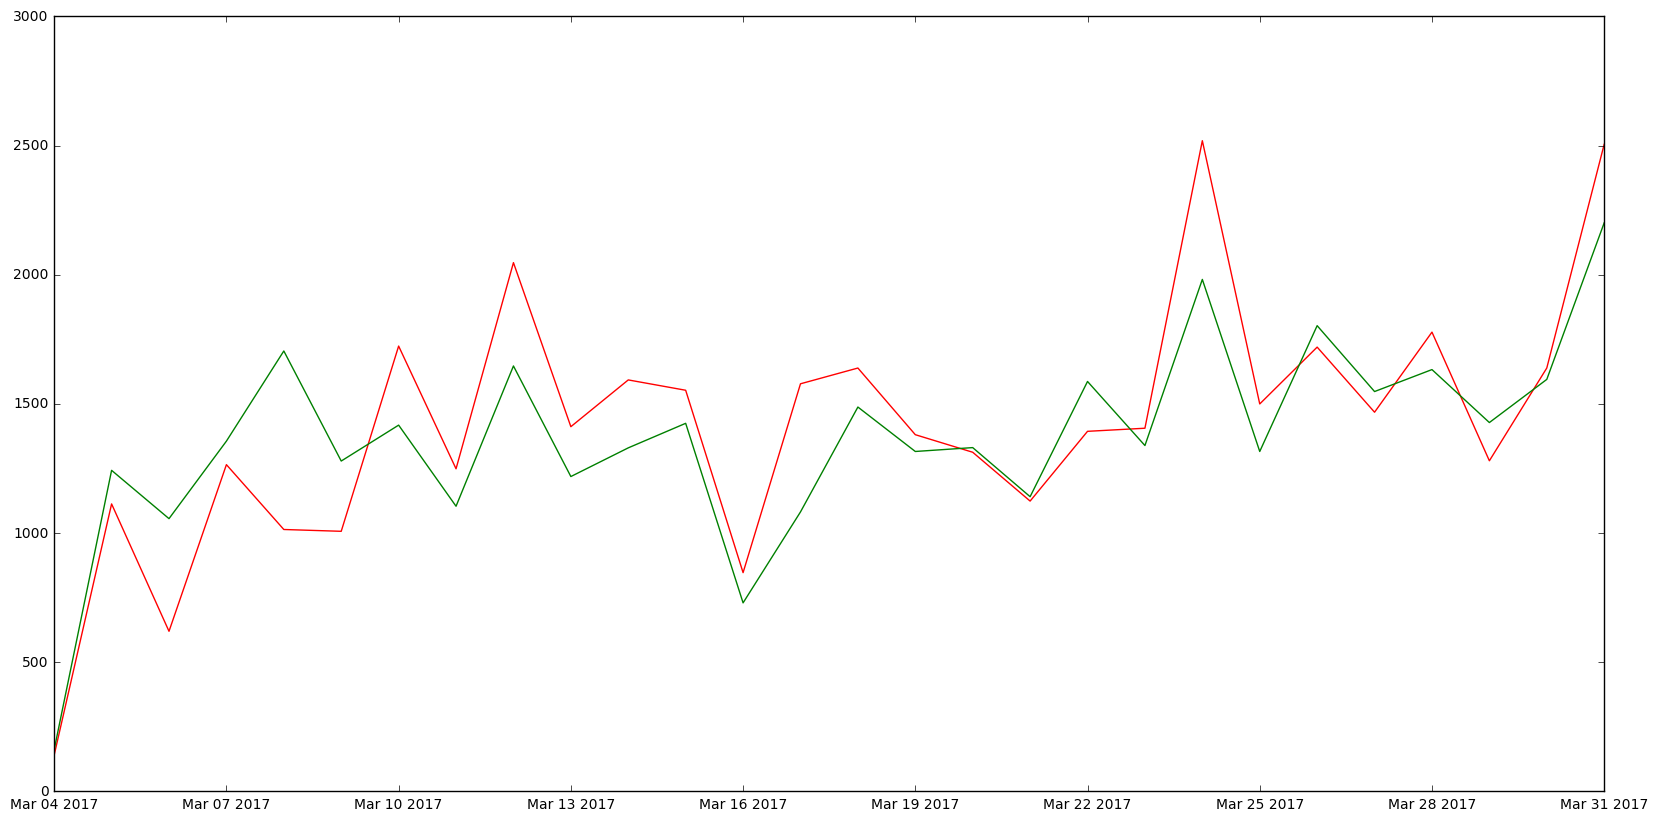

In [42]:
plt.figure(figsize=(20,10))
x = np.arange(0, len(res_ss.actual))
plt.plot(res_ss.Date, res_ss.actual, 'r', res_ss.Date, res_ss.predictions, 'g')
# plt.plot(x, res_ss.actual, 'r', x, res_ss.predictions, 'g')